## Hypothesis

The hypothesis is that a higher proportion of people voted for the presidential post based on the agenda compared to the mess secretary post.



In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('startElec.csv')

In [4]:
count_agenda_votes_pres = df[df['Why did you vote for him?'] == 'You found the agenda appealing'].shape[0]
total_votes = df.shape[0]

p1_cap = count_agenda_votes_pres/total_votes

print(p1_cap)

0.1534090909090909


In [5]:
count_agenda_votes_mess = df[df['Why did you vote for him?.1'] == 'You found the agenda appealing'].shape[0]

p2_cap = count_agenda_votes_mess/total_votes
print(p2_cap)

0.3125


In [6]:
p0 = 0

var_p1 = p1_cap*(1-p1_cap)/total_votes
var_p2 = p2_cap*(1-p2_cap)/total_votes

std_dev = np.sqrt(var_p1 + var_p2)

z_star = ((p1_cap - p2_cap) - p0)/std_dev

print("z_star: ", z_star)

z_star:  -3.594755914944917


In [7]:
# lets take alpha = 0.05
alpha = 0.05
z_alpha = 1.645

# print(z_alpha)
# print(z_star)

if z_star <= -1*z_alpha:
    print("Null Hypothesis is rejected")
else:
    print("Null Hypothesis is accepted")

Null Hypothesis is rejected


In [8]:
import math

In [9]:
ci_lower = (p1_cap - p2_cap) - z_alpha * math.sqrt(p1_cap*(1-p1_cap)/total_votes + p2_cap*(1-p2_cap)/total_votes)
ci_upper = (p1_cap - p2_cap) + z_alpha * math.sqrt(p1_cap*(1-p1_cap)/total_votes + p2_cap*(1-p2_cap)/total_votes)
print("Confidence Interval: ", ci_lower, ci_upper)

Confidence Interval:  -0.23189266577389533 -0.08628915240792284



## Conclusion

Thus, we can conclude that a higher proportion of people voted for the mess secretary post based on the agenda than the presidential post.


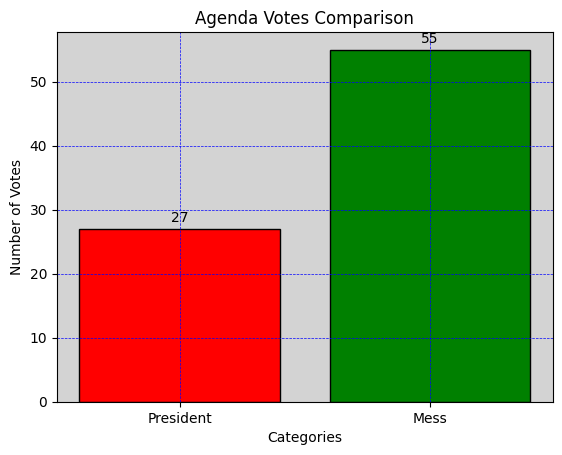

In [27]:
import matplotlib.pyplot as plt

categories = ['President', 'Mess']
votes = [count_agenda_votes_pres, count_agenda_votes_mess]

fig, ax = plt.subplots()
bars = ax.bar(categories, votes, color=['red', 'green'], edgecolor='black')
ax.set_facecolor("lightgray")

for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel('Categories')
plt.ylabel('Number of Votes')
plt.title('Agenda Votes Comparison')


plt.grid(color = 'blue', linestyle = '--', linewidth = 0.5)

plt.show()
